### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [151]:
 nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [152]:
NAME1 = "Siddhant Som" 
NAME2 = ""
GROUP = ""

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

AssertionError: You are not running Python 3.7. Make sure to run Python through the course Conda environment.

### Check that notebook server has access to all required resources, and that notebook has not moved

In [3]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [4]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [5]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall). You can download the dataset from Kaggle but you will need a Kaggle account. This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




# YOUR CODE HERE

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [154]:
data = pd.read_csv(r'C:\Users\Siddhant\Desktop\pytcu11\300k.csv')

# YOUR CODE HERE

c:\users\siddhant\desktop\pytcu11\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [155]:
columns = ['latitude', 'longitude', 'class']
data1 = data[columns]

# YOUR CODE HERE

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [156]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [10]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [157]:
print(name_dict['Diglett'])
print(name_dict['Seel'])
print(name_dict['Tauros'])

data2 = data1[data1['class'].isin([50, 86, 128])]
# YOUR CODE HERE
print(len(data2[data2['class'] == 50]))
print(len(data2[data2['class'] == 86]))
print(len(data2[data2['class'] == 128]))

50
86
128
721
692
670


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a histogram of the number of occurrences of each class.

Text(3.799999999999997, 0.5, 'frequency')

<Figure size 720x576 with 0 Axes>

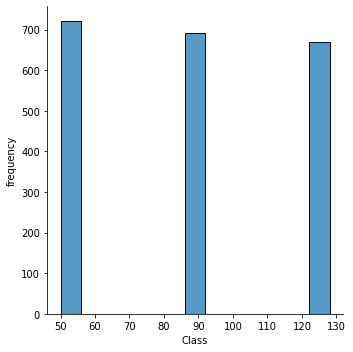

In [12]:
plt.figure(figsize = (10, 8))
#plt.hist(data2['class'])
sns.displot(data2['class'])
plt.xlabel('Class')
plt.ylabel('frequency')

# YOUR CODE HERE

Is the dataset balanced?

**Your answer:** The dataset is slightly unbalanced with there being more instances of Diglett(class 50) than Seel and Tauros. 

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

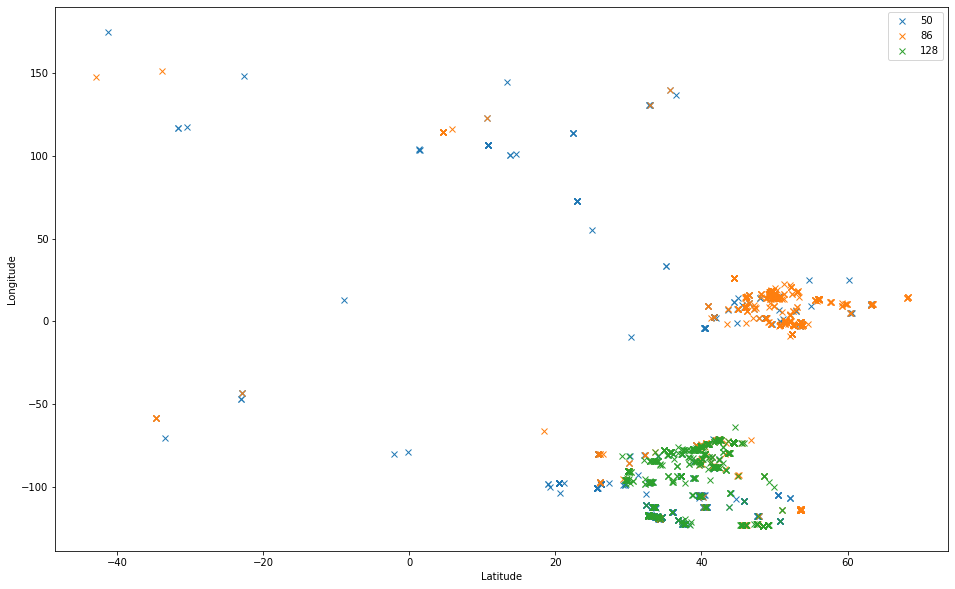

In [222]:
classes = data2.groupby('class')

fig, ax = plt.subplots(figsize = (16,10))
for name, c in classes:
    ax.plot(c.latitude, c.longitude, marker = 'x', linestyle = ' ', label = name)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.legend()


# YOUR CODE HERE

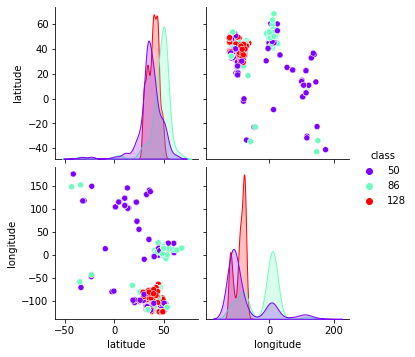

In [149]:
sns.pairplot(data2, hue = 'class', palette = 'rainbow' )

Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** (fill in here)

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** A lot of the points belonging to Diglett are spread out, which suggests that estimating a precise location for Diglett is very diffult On the other hand, the points belonging to Tauros are all concentrated in one region, suggesting that it is easy to narrow down our predictions when we have to predict locations for Tauros. The location points of Tauros also overlap quite a bit with Diglett and Seel. Hence there will be instances of Diglett and Seel, which the model might classify as Tauros instead. Overall, the classification does not seem easy, because some points are spread out all over the place and some are tightly clustered but overlap a lot. 

Which accuracy do you expect to achieve?

**Your answer:** An accuracy of 55-70% might be a good estimate considering the diffculty of the problem at hand.

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [122]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X = data2[['latitude', 'longitude']].values
y = data2['class'].values

def encode_classes(classes):
    if classes == 50:
        return 0
    if classes == 86:
        return 1
    if classes == 128:
        return 2
    else:
        raise ValueError('Classes \'{}\' is not recognized.'.format(classes))
# YOUR CODE HERE

temp = map(encode_classes, data2['class'].values)
y = np.array(list(temp))

# # YOUR CODE HERE

Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3125)



## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [131]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch_X = torch.tensor(X_train, dtype=torch.float32)
torch_y = torch.tensor(y_train, dtype=torch.int64)

torch_X_val = torch.tensor(X_val, dtype=torch.float32)
torch_y_val = torch.tensor(y_val, dtype=torch.int64)

t_dataset = TensorDataset(torch_X, torch_y)
t_data_loader = DataLoader(t_dataset, batch_size=32)

t_dataset_val = TensorDataset(torch_X_val, torch_y_val)
t_data_loader_val = DataLoader(t_dataset_val, batch_size=32)


class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,8)
        self.fc2 = nn.Linear(8,8)
        self.fc3 = nn.Linear(8,8)
        self.fc4 = nn.Linear(8,8)
        self.fc5 = nn.Linear(8,8)
        
        self.out = nn.Linear(8,3)
        
    def forward(self, x):
        x = x #input layer
        
        x = self.fc1(x) #fc1
        x = F.relu(x)
        
        x = self.fc2(x) #fc2
        x = F.relu(x)
        
        x = self.fc3(x) #fc3
        x = F.relu(x)
        
        x = self.fc4(x) #fc4
        x = F.relu(x)
        
        x = self.fc5(x) #fc5
        x = F.relu(x)
        

        
        x = self.out(x)
        x = F.softmax(x, dim = 1)
        
        return x
# YOUR CODE HERE

Train the network.

In [164]:
model = Network()

loss_fn = nn.CrossEntropyLoss()

from torch import optim
optimizer = optim.Adam(model.parameters(), lr=0.01)
for epoch in range(20):
    
    # Compute predictions and back-prop in the training set
    losses = []
    n_correct = 0
    for b_x, b_y in t_data_loader:
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        hard_preds = pred.argmax(dim=1)
        n_correct += (pred.argmax(dim=1) == b_y).sum().item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_accuracy = n_correct/len(t_dataset)
    train_avg_loss = sum(losses)/len(losses)    

        
    # Compute predictions in the validation set (with adagrad deactivated)
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in t_data_loader_val:
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += (pred.argmax(dim=1) == b_y).sum().item()
        val_accuracy = n_correct/len(t_dataset_val)
        val_avg_loss = sum(losses)/len(losses)      
        
        
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f} '
    display_str += '\tAccuracy (train): {:.2f} '
    display_str += '\tAccuracy (val): {:.2f} '
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))


# YOUR CODE HERE

Epoch 0 	Loss: 0.980 	Loss (val): 0.926 	Accuracy (train): 0.55 	Accuracy (val): 0.64 
Epoch 1 	Loss: 0.914 	Loss (val): 0.917 	Accuracy (train): 0.63 	Accuracy (val): 0.63 
Epoch 2 	Loss: 0.897 	Loss (val): 0.887 	Accuracy (train): 0.65 	Accuracy (val): 0.63 
Epoch 3 	Loss: 0.904 	Loss (val): 0.894 	Accuracy (train): 0.65 	Accuracy (val): 0.62 
Epoch 4 	Loss: 0.907 	Loss (val): 0.898 	Accuracy (train): 0.64 	Accuracy (val): 0.62 
Epoch 5 	Loss: 0.909 	Loss (val): 0.898 	Accuracy (train): 0.64 	Accuracy (val): 0.63 
Epoch 6 	Loss: 0.906 	Loss (val): 0.909 	Accuracy (train): 0.64 	Accuracy (val): 0.63 
Epoch 7 	Loss: 0.895 	Loss (val): 0.895 	Accuracy (train): 0.64 	Accuracy (val): 0.68 
Epoch 8 	Loss: 0.896 	Loss (val): 0.882 	Accuracy (train): 0.65 	Accuracy (val): 0.67 
Epoch 9 	Loss: 0.894 	Loss (val): 0.885 	Accuracy (train): 0.65 	Accuracy (val): 0.64 
Epoch 10 	Loss: 0.898 	Loss (val): 0.896 	Accuracy (train): 0.65 	Accuracy (val): 0.62 
Epoch 11 	Loss: 0.902 	Loss (val): 0.888 	

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [238]:
test_samples = torch.tensor(X_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.int64)

preds = model(test_samples).argmax(dim=1)
# YOUR CODE HERE

Compute the confusion matrix of your predictions on the test set.

Accuracy: 0.64
[[96 17 24]
 [15 79 40]
 [56  0 90]]


<AxesSubplot:>

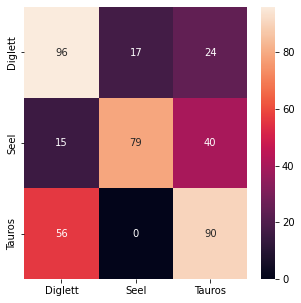

In [239]:


acc = (preds == test_labels).sum().item()/len(preds)
print("Accuracy: %.2f" % acc)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, preds)

print(cm)
plt.figure(figsize = (5,5))

sns.heatmap(cm, xticklabels = ['Diglett', 'Seel', 'Tauros'], yticklabels = ['Diglett', 'Seel', 'Tauros'], annot = cm)
# YOUR CODE HERE

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** The accuracy is pretty average at 63%. The leading diagonal represents all the correctly predicted pokemons. There are 56 instances where the model predicted class 0(Diglett), but the true label was actually 2(Tauros), suggesting that the locations of Tauros and Diglett overlap quite a bit. Whereas, 0 instances of Tauros were mistaken to be Seel. However it is interesting to note that 40 instances of Seel were predicted to be Tauros. Thus we may say that our model has an easier deciding which points are not Seel's location than the points for Tauros. However, overall there are a significant number of misclassifications for all 3 classes, which was expected based on the scatter plot. 

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

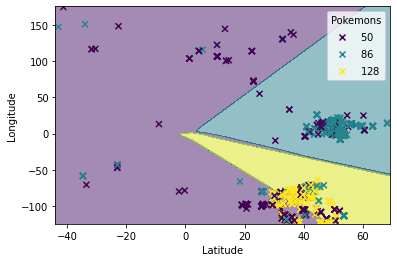

In [214]:
min1, max1 = data2['latitude'].min() - 1, data2['latitude'].max()+1
min2, max2 = data2['longitude'].min() - 1, data2['longitude'].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)
grid = np.c_[xx.ravel(), yy.ravel()]
grid = torch.tensor(grid)

batch_size = 64

grid_l = TensorDataset(grid)
grid_loader = DataLoader(grid_l, batch_size = 32)
preds = []

with torch.set_grad_enabled(False):
    for b_x in grid_loader:
        pred = model(b_x[0].float())
        
        preds.extend(np.argmax(pred.numpy(), axis = 1))


zz = np.array(preds).reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha = 0.5)
scatter = plt.scatter(data2['latitude'], data2['longitude'], c = data2['class'], marker = 'x')
plt.legend(*scatter.legend_elements(), loc = 'upper right', title = 'Pokemons')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# YOUR CODE HERE

Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:** The yellow region represents the locations of Tauros, which surrounds the cluster of points representing the location of Tauros. This was expected since the locations of tauros in the given data are concentrated in one region only. The blue region representing the locations of Seel was also expected since we can clearly see a huge cluster of locations for Seel too. The rest of the plot is purple since Diglette's locations and are spread all over the place and hence our model has predicted a rather large region as it's decision region. Based on the scatter plot we had seen previously, this is what was expected.

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** Based on the decision boundaries, we can see which regions are heavily concentrated with a particular type of pokemon. We can go to a region expecting to find the pokemon desired. Since there is also some overlap between so many of the points, I might consider going to such locations because then I might capture 2 pokemons in the same region.

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** Population density could be an important feature because pokemons could prefer a region based on how many humans live there. Some pokemons may be shy and not like humans and may prefer sparsely populated areas. Other smay be comfortable with humans and may not shy away from more populated areas. Pressure could influence Pokemons whose strength relies on wind. A pokemon like Tauros could benefit more from higher pressure areas.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

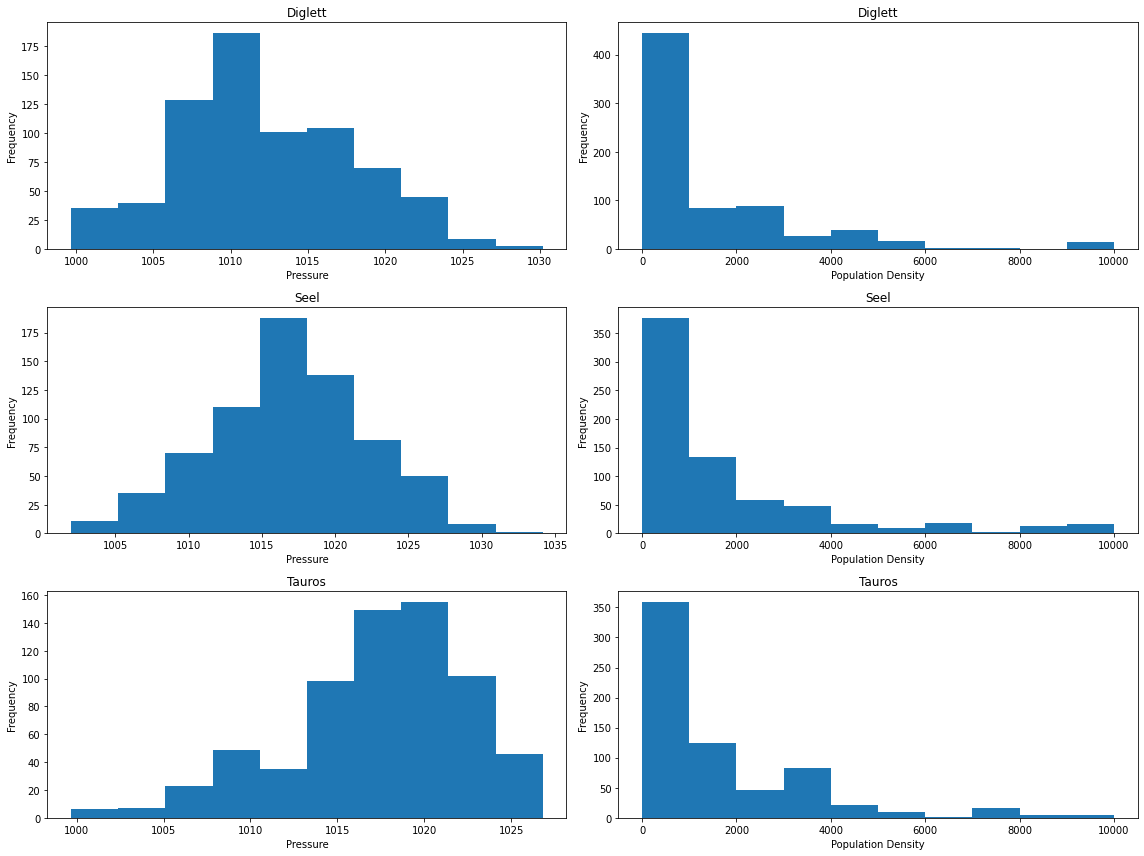

In [236]:

new_data = data.filter(['pressure', 'population_density', 'class'], axis = 1)

new_data = new_data[new_data['class'].isin([50, 86, 128])]
plt.figure(figsize = (16,12))
plt.subplot(3,2,1)
plt.hist(new_data[new_data['class']==50]['pressure'])
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.title('Diglett')
plt.tight_layout()

plt.subplot(3,2,2)
plt.hist(new_data[new_data['class']==50]['population_density'])
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.title('Diglett')
plt.tight_layout()

plt.subplot(3,2,3)
plt.hist(new_data[new_data['class']==86]['pressure'])
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.title('Seel')
plt.tight_layout()

plt.subplot(3,2,4)
plt.hist(new_data[new_data['class']==86]['population_density'])
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.title('Seel')
plt.tight_layout()

plt.subplot(3,2,5)
plt.hist(new_data[new_data['class']==128]['pressure'])
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.title('Tauros')
plt.tight_layout()

plt.subplot(3,2,6)
plt.hist(new_data[new_data['class']==128]['population_density'])
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.title('Tauros')
plt.tight_layout()
# YOUR CODE HERE

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:** As was hypothesized, population density is seen to play a crucial role in the occurences of the pokemons. We see that the frequencies of the pokemons are maximum when the population densities are low. So if I were to go and look for these pokemons, I would prefereably go to less populated areas. When it comes to pressure, the frequencies of Tauros is higher in higher pressure regions, suggesting that it prefers high pressure areas for its attacks. Wheras Diglette and Seel are found more in medium pressure regions suggesting that pressure may not be their greatest strength. 

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not except very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** If we use a regression approach, our output would need to be a numerical value which would be calculated using the latitude and longitude. 

Pros:
1. We get a precise numerical output suggesting how close we would be to finding the desired pokemon. 
2. Interpretaion of out output is very simple. 

Cons:
1. We see that our scatter plot has a lot of outliers, which may result in a huge range of outputs and may result in a poor performance since linear regression is heavily dependnent on estimating the mean accurately, and is also very sensitive to outliers. Thus we would have a torrid time trying to capture Diglett if we use linear regression.
2. Linear regression also suffers if there is dependencies among features. We expect a significant amount of dependence of pressure on latitude and longitude. 

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [242]:
columns1 = ['latitude', 'longitude', 'pressure', 'population_density', 'class']
data3 = data[columns1]
data4 = data3[data3['class'].isin([50, 86, 128])]


X1 = data4[['latitude', 'longitude', 'pressure', 'population_density']].values
y1 = data4['class'].values

temp1 = map(encode_classes, data4['class'].values)
y1 = np.array(list(temp1))

# YOUR CODE HERE

In [243]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size = 0.3125)

In [246]:
torch_X1 = torch.tensor(X_train1, dtype=torch.float32)
torch_y1 = torch.tensor(y_train1, dtype=torch.int64)

torch_X_val1 = torch.tensor(X_val1, dtype=torch.float32)
torch_y_val1 = torch.tensor(y_val1, dtype=torch.int64)

t_dataset1 = TensorDataset(torch_X1, torch_y1)
t_data_loader1 = DataLoader(t_dataset1, batch_size=32)

t_dataset_val1 = TensorDataset(torch_X_val1, torch_y_val1)
t_data_loader_val1 = DataLoader(t_dataset_val1, batch_size=32)


class Network1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4,8)
        self.fc2 = nn.Linear(8,8)
        self.fc3 = nn.Linear(8,8)
        self.fc4 = nn.Linear(8,8)
        self.fc5 = nn.Linear(8,8)
        
        self.out = nn.Linear(8,3)
        
    def forward(self, x):
        x = x #input layer
        
        x = self.fc1(x) #fc1
        x = F.relu(x)
        
        x = self.fc2(x) #fc2
        x = F.relu(x)
        
        x = self.fc3(x) #fc3
        x = F.relu(x)
        
        x = self.fc4(x) #fc4
        x = F.relu(x)
        
        x = self.fc5(x) #fc5
        x = F.relu(x)
        

        
        x = self.out(x)
        x = F.softmax(x, dim = 1)
        
        return x

In [248]:
model1 = Network1()

loss_fn = nn.CrossEntropyLoss()

from torch import optim
optimizer = optim.Adam(model1.parameters(), lr=0.01)
for epoch in range(20):
    
    # Compute predictions and back-prop in the training set
    losses = []
    n_correct = 0
    for b_x, b_y in t_data_loader1:
        pred = model1(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        hard_preds = pred.argmax(dim=1)
        n_correct += (pred.argmax(dim=1) == b_y).sum().item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_accuracy = n_correct/len(t_dataset1)
    train_avg_loss = sum(losses)/len(losses)    

        
    # Compute predictions in the validation set (with adagrad deactivated)
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in t_data_loader_val1:
            pred = model1(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += (pred.argmax(dim=1) == b_y).sum().item()
        val_accuracy = n_correct/len(t_dataset_val1)
        val_avg_loss = sum(losses)/len(losses)      
        
        
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f} '
    display_str += '\tAccuracy (train): {:.2f} '
    display_str += '\tAccuracy (val): {:.2f} '
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))


Epoch 0 	Loss: 1.114 	Loss (val): 1.112 	Accuracy (train): 0.34 	Accuracy (val): 0.34 
Epoch 1 	Loss: 1.090 	Loss (val): 1.065 	Accuracy (train): 0.38 	Accuracy (val): 0.40 
Epoch 2 	Loss: 1.061 	Loss (val): 1.043 	Accuracy (train): 0.37 	Accuracy (val): 0.40 
Epoch 3 	Loss: 1.045 	Loss (val): 0.995 	Accuracy (train): 0.42 	Accuracy (val): 0.49 
Epoch 4 	Loss: 0.990 	Loss (val): 0.960 	Accuracy (train): 0.52 	Accuracy (val): 0.57 
Epoch 5 	Loss: 1.013 	Loss (val): 1.181 	Accuracy (train): 0.52 	Accuracy (val): 0.36 
Epoch 6 	Loss: 1.200 	Loss (val): 1.134 	Accuracy (train): 0.34 	Accuracy (val): 0.38 
Epoch 7 	Loss: 1.076 	Loss (val): 0.985 	Accuracy (train): 0.41 	Accuracy (val): 0.43 
Epoch 8 	Loss: 1.008 	Loss (val): 1.042 	Accuracy (train): 0.50 	Accuracy (val): 0.44 
Epoch 9 	Loss: 1.065 	Loss (val): 1.071 	Accuracy (train): 0.44 	Accuracy (val): 0.45 
Epoch 10 	Loss: 1.044 	Loss (val): 0.988 	Accuracy (train): 0.46 	Accuracy (val): 0.47 
Epoch 11 	Loss: 0.989 	Loss (val): 0.978 	

In [251]:
test_samples1 = torch.tensor(X_test1, dtype=torch.float32)
test_labels1 = torch.tensor(y_test1, dtype=torch.int64)

preds1 = model1(test_samples1).argmax(dim=1)

Accuracy: 0.67
[[95 31 28]
 [12 92 33]
 [31  2 93]]


<AxesSubplot:>

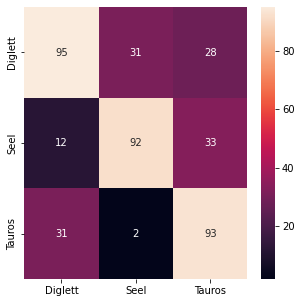

In [252]:
acc = (preds1 == test_labels1).sum().item()/len(preds1)
print("Accuracy: %.2f" % acc)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels1, preds1)

print(cm)
plt.figure(figsize = (5,5))

sns.heatmap(cm, xticklabels = ['Diglett', 'Seel', 'Tauros'], yticklabels = ['Diglett', 'Seel', 'Tauros'], annot = cm)

We see a slight increase in test accuracy suggesting that the 2 added features were of some use. Using 4 features is better than using 2 features as we can see.